<a href="https://colab.research.google.com/github/AY0ungKim/AI-Study/blob/main/Image_classification_Nearest_Neighbors%26Softmax_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*서울대학교 데이터사이언스대학원 이준석 교수님 강의 정리*

## **1. Nearest Neighbors**

**1) 정의**: 주어진 데이터를 기준으로 가까운 데이터 포인트간의 거리를 계산해서 가장 가까운 거리를 가진 라벨로 분류하는 방법


**2) similarity(distance)계산**

> **L1 distance**: 절댓값 이용

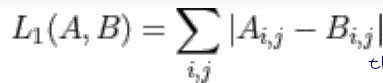

> **L2 distance**: 차의 제곱 이용

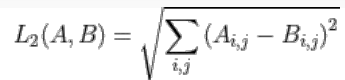


**3) 과정**

- 보통 Image classification은 세 가지 과정을 거침

>1. **Collect** a dataset of images and labels.
>2. Use a machine learning algorithm to **train** a classifier.
>3. Use the classifier to **predict unseen images**.

- Nearest Nighbor 과정

>2. Use a machine learning algorithm to **train** a classifier

>> 이 과정에서 그저 데이터와 라벨을 저장함 (**Time complexity = 1**)

>3. Use the classifier to **predict unseen images**.

>> 이 과정에서 모든 image들과 similarity를 계산해서 predict (**Time complexity = N(데이터 포인트 개수)**) -> *Lazy method*, 너무 효율적이지 않음 (training을 하더라도 predict에서 계산량을 줄이는게 더 좋음)


**4) K-Nearest Neighbors (KNN)**

- K개의 data point와의 거리를 계산하여 분류하는 기법 (k가 늘어날수록 공백이 생겨 분류하지 못하는 지점이 생기지만 overfitting이 줄어듬)

- KNN은 다음과 같은 이유로 잘 사용하지 않음
>- Distance라는 것이 너무 정보적이지 않음
>- test할 때 너무 많은 계산량이 소요됨
>- **Curse of dimension**: image는 차원이 너무 크므로 분류를 위해서는 엄청나게 많은 data가 필요 (차원 축소 후 KNN 이용하기도 함)



In [1]:
#Nearest Neigbor using L1 distance

import numpy as np
class NearestNeighbor:
  def __init__(self):
    pass
  def train(self, images, labels):
# simply remembers all the training data
    self.images = images
    self.labels = labels
  def predict(self, test_image):
# assume that each image is vectorized to 1D
    min_dist = sys.maxint # maximum integer in python
    for i in range(self.images.shape[0]):
      dist = np.sum(np.abs(self.images[i, :] - test_image))
      if dist < min_dist:
        min_dist = dist
        min_index = i
      return self.labels[min_index]

## **2.Linear Classifier**


**1)원리**

- 아래 그림과 같이, image x를 넣었을 때, 중간에 어떤 f(x)를 통해 각 label에 대한 score을 반환하는 idea를 사용해보자

- 여기 f(x)에 linear function을 사용하는 방식 -> **각 input에 weighted sum**을 적용

<br/>

**2)과정**

- x: 32 x 32 x 3개의 image의 pixel을 3072 x 1로 펼치기

- W: 각 label에 따라 기존 image들을 이용해서 weighted 계산해둠 (10 x 3072)

- b: 데이터 자체의 분포를 반영하기 위한 bias

>> 따라서 이 3가지 요소의 선형 조합으로 f(x,W)을 각 label에 따라 만들어서 score을 계산한 뒤, 가장 score가 큰 곳에 분류


> 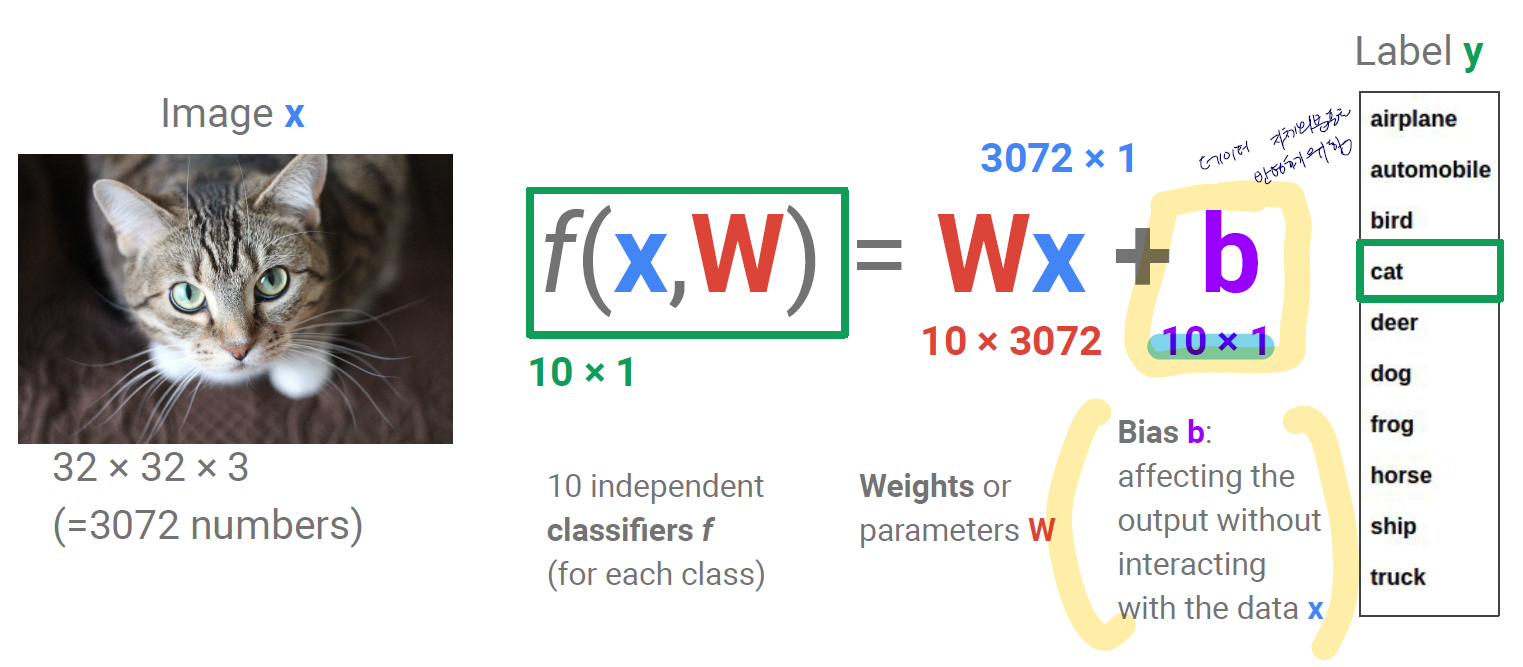


**3) 장점**

- training시에 W만 계산하면 되므로 space effeicient

- test에는 class의 개수만큼만 계산하면 되므로 time efficient

## **3. Softmax classifier**

**1) 원리**

위에 linear classifier에서 나온 label score이 얼마나 큰 것인지에 대한 해석이 모호함

-> softmax function을 이용해서 각 score을 0과 1사이로 만들기

**2) 수식**

각 i번째 class인 sI에 대해서, 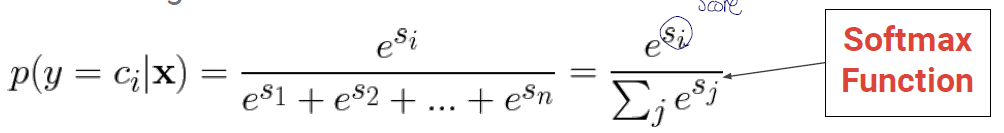

> 그러면 확률적인 해석이 가능해지므로, 아래와 같이 나타낼 수 있음

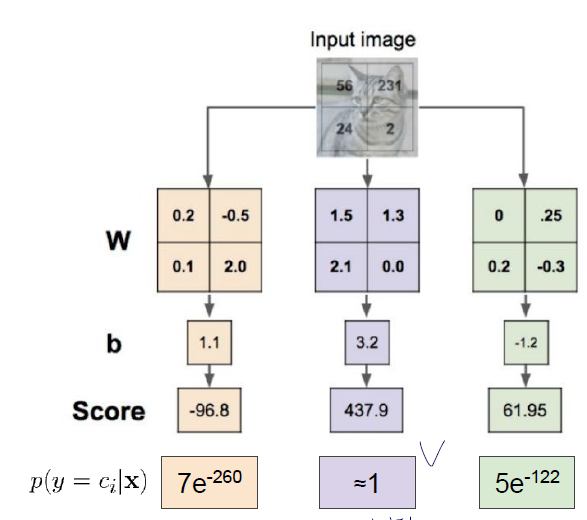

## **4. Training Softmax classifiers**

- trainig 시에 **loss를 어떻게 계산할 것인가**

**1) Cross-Entropy**




> N=data point 개수, K=class 개수, y(ik)= i번째 data가 k번째 class에 속하냐에 따른 indicator일때, 식은 다음과 같이 나타낼 수 있음

> 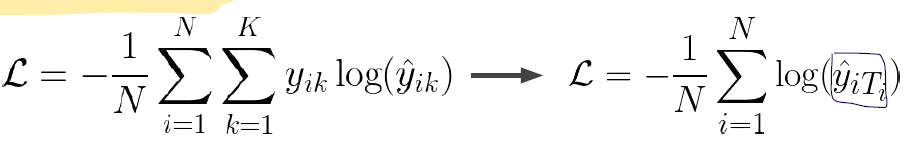

>- y(ik)는 해당하는 class에서만 1이기 때문에, 위와 같이 변형할 수 있음 (T_i=i번째 data point의 정답인 class)

>- 즉, **-log(true class에 대한 예측된 확률)의 합**을 의미함.

>-log함수의 성질을 통해, y->1이면 (맞으면) loss는 0에 수렴하고, y->0(틀리면) loss는 무한대로 발산한다






<br/>

**2) Kullback-Leibler (KL) Divergence**


- 하나의 probability P와 reference probability Q와의 차이를 계산하는 방법 (P와 Q의 위치를 바꾸면 값이 달라지므로 완전한 DISTANCE 개념은 아니지만 비슷한 의미여서 자주 쓰임)

> 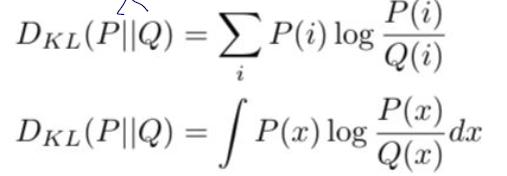